### 블로그 글 작성 주제 선정

넷플릭스 : 넷플릭스는 영화의 평점과 후기를 앱에서 보여주지 않기 때문에 사람들이 직접 검색해서 후기를 찾아볼 것이다  
netflix ranking site : "https://flixpatrol.com/top10/netflix/south-korea/"

problem
1. movie 명이 영어로 되있어서 한글로 번역해야하는데 단순 번역이 안맞음
2. 같은 이름을 가진 영화들의 전처리 필요
3. 사진을 같이 업로드해야함
--- 영화 블로그는 정교한 분석을 필요로하고 같은 영화 이름을 처리하거나 사진을 찾는 것이 어려움

음식 : 현재 사람들이 많이 주문하는 음식들의 효능 및 부작용을 작성하는 블로그글 , 추후 쿠팡 파트너스 연계로 수익화

1. 식품 크롤링하여 선택

        problem
                1. 쿠팡 > 식품 >  과일 탭에서 쿠팡 추천 랭킹순 크롤링 url = "https://www.coupang.com/np/categories/194282" -> 쿠팡 웹페이지 런타임 오류 
                2. 쿠팡 웹페이지 런타임 오류 -> 마켓컬리로 변경 url = "https://www.kurly.com/collections/market-best"
                3. 마켓컬리도 크롤링은 막아놓은 듯 함.. 재접속이나 페이지 이동시 런타임 오류 현상 발생
                4. 네이버 쇼핑 -> 품목의 이름이 너무 복잡함 ex) 40년 단감 태추단감 감 부유 고당도 대봉 홍시 진영단감 선물세트..
        

        -> 11번가로 크롤링 결정
                ex) ['[최종가5,900원]해물오꼬노미야끼', '밀키트', '2인분'] ['최종', '해물', '꼬', '노미', '끼', '밀', '키트', '인분']
                키워드를 뽑는 알고리즘을 뽑아 내야함 
                방법 1. 상세 페이지 내에서 나온 단어 수를 count 하여 중요도 결정 및 그래프를 보며 알고리즘 수정

2. 이름, 이미지 크롤링
3. 이름 -> chatgpt로 script 생성
4. 블로그에 script, 이미지 적용
5. script내에서 tag 추출, tag 적용
6. 업로드



### 블로그 글 chatgpt openai로 생성

### 생성된 글을 네이버 블로그에 작성

### 추후 블로그 성장률에 따른 글 작성 방법 수정

general problem 
1. chatgpt의 openai의 토큰이 쉽게 넘어가 유료 플랜을 사용해야함 -> gui로 직접 사용

In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

from selenium.webdriver.chrome.options import Options
import time
import re
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12

In [3]:
from konlpy.tag import Okt

In [4]:
import os
os.environ['JAVA_HOME'] = "C:\Program Files\Java"

In [5]:
okt = Okt()
text = "품질보장! 경북 영천 샤인머스켓 1kg"
okt.pos(text)
okt.nouns(text)

['품질', '보장', '경북', '영천', '샤인', '머스켓']

In [6]:
url = "https://www.11st.co.kr/browsing/BestSeller.tmall?method=getBestSellerMain&cornerNo=1"
res = requests.get(url)
soup = BeautifulSoup(res.text, 'lxml')
food_list = soup.find('div', class_="best_prd_box").find_all('li')
food_list[0].a['href']

'https://www.11st.co.kr/products/3491750642?inpu=&trTypeCd=22&trCtgrNo=895019'

In [7]:
food_list[0].p.text.strip()

'[최종가5,900원]해물오꼬노미야끼 밀키트 2인분'

In [8]:
urls =[]
names = []
for food in food_list[:5]:
    urls.append(food.a['href'])
    names.append(food.p.text.strip())

print(urls), print(names)

['https://www.11st.co.kr/products/3491750642?inpu=&trTypeCd=22&trCtgrNo=895019', 'https://www.11st.co.kr/products/6019941174?inpu=&trTypeCd=22&trCtgrNo=895019', 'https://www.11st.co.kr/products/4848462556?inpu=&trTypeCd=22&trCtgrNo=895019', 'https://www.11st.co.kr/products/2190613796?inpu=&trTypeCd=22&trCtgrNo=895019', 'https://www.11st.co.kr/products/5257830903?inpu=&trTypeCd=22&trCtgrNo=895019']
['[최종가5,900원]해물오꼬노미야끼 밀키트 2인분', '[품질보장]꿀처럼 달콤한 허니듀 대과/특대과', '하남쭈꾸미 보통매운맛, 500g, 5개', '[깨비농원] 새콤달콤 햇 노지 감귤 4.5kg 9kg #첫수확', '메추리알 장조림 2kg(1kg x 2팩)']


(None, None)

In [9]:
for i in names:
    print(okt.nouns(i))

['최종', '해물', '꼬', '노미', '끼', '밀', '키트', '인분']


['품질', '보장', '꿀', '허니', '듀', '대과', '특대']
['하남', '쭈꾸미', '보통', '맛', '개']
['깨비', '농원', '콤달콤', '햇', '노지', '감귤']
['메추리', '알', '장조림', '팩']


In [10]:
for i in names:
    print(i.split())

['[최종가5,900원]해물오꼬노미야끼', '밀키트', '2인분']
['[품질보장]꿀처럼', '달콤한', '허니듀', '대과/특대과']
['하남쭈꾸미', '보통매운맛,', '500g,', '5개']
['[깨비농원]', '새콤달콤', '햇', '노지', '감귤', '4.5kg', '9kg', '#첫수확']
['메추리알', '장조림', '2kg(1kg', 'x', '2팩)']


In [11]:
for i in okt.nouns(names[1]):
    print(full_text.count(i), i)

NameError: name 'full_text' is not defined

In [12]:
urls[0]

'https://www.11st.co.kr/products/3491750642?inpu=&trTypeCd=22&trCtgrNo=895019'

scroll Done! 1 번째
scroll Done! 2 번째
scroll Done! 3 번째
scroll Done! 4 번째
scroll Done! 5 번째


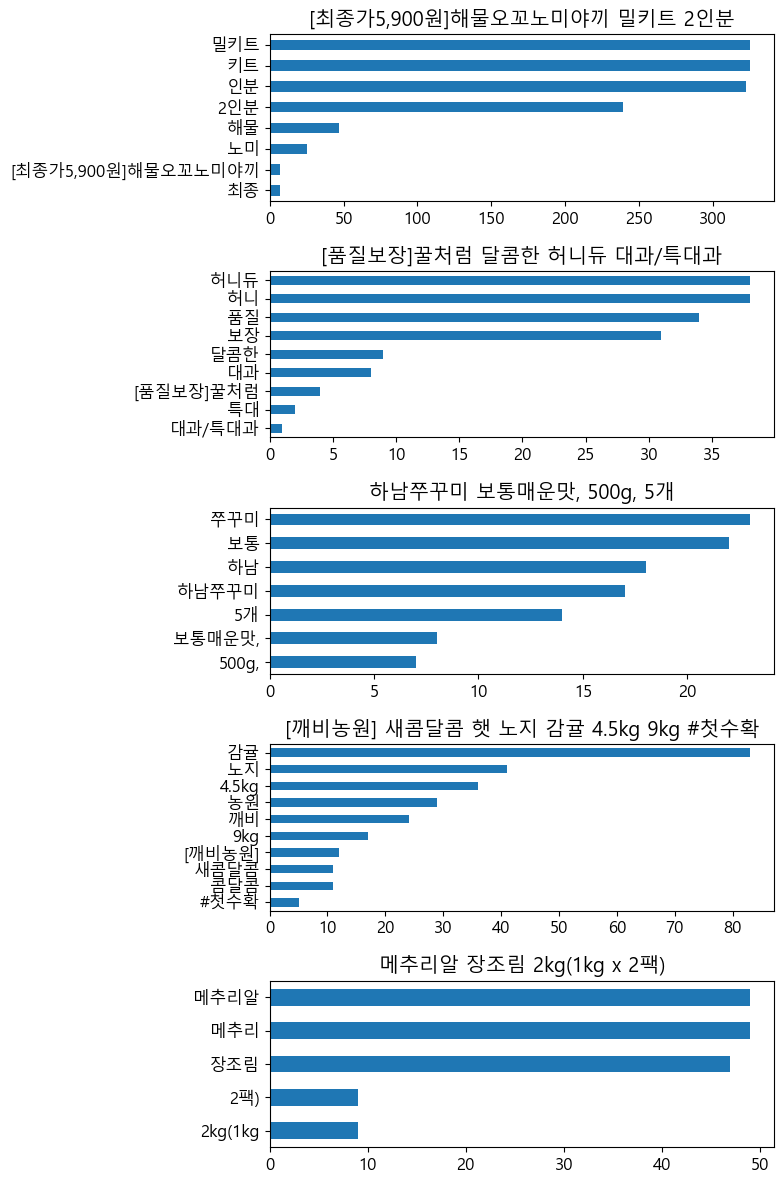

In [13]:
# 동적 스크립트 아래까지 모두 보이게 스크롤
fig, axes = plt.subplots(5, 1, figsize=(8, 12))
for idx, (url, name) in enumerate(zip(urls, names)):

    browser = webdriver.Chrome()
    browser.get(url)

    pre_height = browser.execute_script('return document.body.scrollHeight')

    while True:
        browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        time.sleep(1)

        curr_height = browser.execute_script('return document.body.scrollHeight')

        if curr_height == pre_height:
            break
        pre_height = curr_height
        
    print(f'scroll Done! {idx + 1} 번째')

    soup = BeautifulSoup(browser.page_source, 'lxml')

    # 전체 스크립트로 빈도수 찾기
    full_text = re.sub(r'\s+', ' ',soup.text).strip()

    # 시각화로 비교

    food_count = {}
    for i in okt.nouns(name):
        if len(i) >= 2: # 너무 짧게 파싱된 것은 제외
            food_count[i] = full_text.count(i)
    for j in name.split():
        if len(j) >= 2:
            food_count[j] = full_text.count(j)

    pd.Series(food_count).sort_values(ascending=True)[-10:].plot(kind='barh', ax=axes[idx])
    axes[idx].set_title(name)
        
plt.tight_layout()
plt.show()



In [26]:
soup = BeautifulSoup(browser.page_source, 'lxml')
soup.text

"\n곱마카세 오미자 소곱창160g+(참소스30g) 총190g외 모음전\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n본문 바로가기\n시각장애인을 위해 상품 이미지 설명에 대한 음성 안내 기능이 상품정보탭에 제공되었습니다.\n상품설명 음성 안내 기능 바로가기\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n11번가통합검색검색 카테고리 선택통합검색통합검색쇼킹딜가격비교아마존검색6임영웅공식굿즈7에어팟 프로2실시간검색어 순위 전체보기나의 메뉴나의 11번가주문장바구니최근 본 상품카테고리 전체보기주요서비스 바로가기슈팅배송쇼킹딜베스트쿠폰/기획전장보기T공식대리점아마존신규서비스아마존 딜아마존 베스트로그인회원가입바로가기OFF바로가기 안내\n\n\n\n\n\n\n\n\n스토어 뱃지\n고객서비스 우수\n\n\n\n\n                            아빠식당\n                        \n\n\n\n긍정리뷰\n93.2%\n응답률\n98.2%\n판매량\n\n\n총 5점 중\n4점\n\n\n\n\n정보 보기\n                                \n\n\n판매자 정보\n\n\n긍정리뷰\n고객이 판매자를 평가한 판매자리뷰 중 긍정적 리뷰(4~5점 리뷰) 비율 (최근 365일 기준)\n24시간내 응답\n상품 Q&A 문의에 24시간 내 응답한 비율 (최근 30일 기준)\n판매량\n판매자의 판매건수와 판매금액을 반영하여, 판매량을 5단계로 측정 (최근 365일 기준)\n판매량은 5단계(가장 높은 판매량) ~ 1단계(낮은 판매량)로 노출\n\n\n\n\n닫기\n\n\n\n\n\n\n\n\n\n스토어 찜\n                            찜하기\n9,999+\n\n\n\n\n\n\n닫기\n\n\n\n\n\n\n\n\n\n\n상품 카테고리 정보\n\n\n\n            홈\n        \n>\n\n\n\n\n축산

In [27]:
import re

full_text = re.sub(r'\s+', ' ',soup.text).strip()
full_text

"곱마카세 오미자 소곱창160g+(참소스30g) 총190g외 모음전 본문 바로가기 시각장애인을 위해 상품 이미지 설명에 대한 음성 안내 기능이 상품정보탭에 제공되었습니다. 상품설명 음성 안내 기능 바로가기 11번가통합검색검색 카테고리 선택통합검색통합검색쇼킹딜가격비교아마존검색6임영웅공식굿즈7에어팟 프로2실시간검색어 순위 전체보기나의 메뉴나의 11번가주문장바구니최근 본 상품카테고리 전체보기주요서비스 바로가기슈팅배송쇼킹딜베스트쿠폰/기획전장보기T공식대리점아마존신규서비스아마존 딜아마존 베스트로그인회원가입바로가기OFF바로가기 안내 스토어 뱃지 고객서비스 우수 아빠식당 긍정리뷰 93.2% 응답률 98.2% 판매량 총 5점 중 4점 정보 보기 판매자 정보 긍정리뷰 고객이 판매자를 평가한 판매자리뷰 중 긍정적 리뷰(4~5점 리뷰) 비율 (최근 365일 기준) 24시간내 응답 상품 Q&A 문의에 24시간 내 응답한 비율 (최근 30일 기준) 판매량 판매자의 판매건수와 판매금액을 반영하여, 판매량을 5단계로 측정 (최근 365일 기준) 판매량은 5단계(가장 높은 판매량) ~ 1단계(낮은 판매량)로 노출 닫기 스토어 찜 찜하기 9,999+ 닫기 상품 카테고리 정보 홈 > 축산 카테고리 목록 열기 브랜드패션 브랜드 여성의류 브랜드 여성신발 브랜드 여성가방 디자이너 여성의류 브랜드 남성의류 브랜드 남성신발 브랜드 남성가방 디자이너 남성의류 캐주얼/유니섹스 브랜드 언더웨어 브랜드 여행가방 브랜드 지갑/벨트 브랜드 주얼리 브랜드 시계 브랜드 잡화/소품 디자이너 잡화 수입명품 트렌드패션 여성의류 여성신발 여성가방 임부복/소품 남성의류 남성신발 남성가방 언더웨어/잠옷 여행가방/소품 지갑/벨트 주얼리 시계 패션잡화 뷰티 스킨케어 메이크업 선케어 클렌징/필링 남성화장품 향수 헤어케어 바디케어 네일케어 뷰티소품 식품 과일 채소 곡물 건과/견과 축산 수산 김치 반찬/젓갈 전통식품 가공식품 커피/생수/음료 과자/간식 냉장/냉동식품 우유/유제품 밀키트/쿠킹박스 건강식품 다이어트식품 스포츠/레저/자동차 

In [31]:
for i in okt.nouns(names[1]):
    print(full_text.count(i), i)

for i in names[1].split():
    print(full_text.count(i), i)

26 오미자
132 곱창
73 소스
50 총
54 외
26 곱마카세
26 오미자
7 소곱창160g+(참소스30g)
7 총190g외
19 모음전


<Axes: >

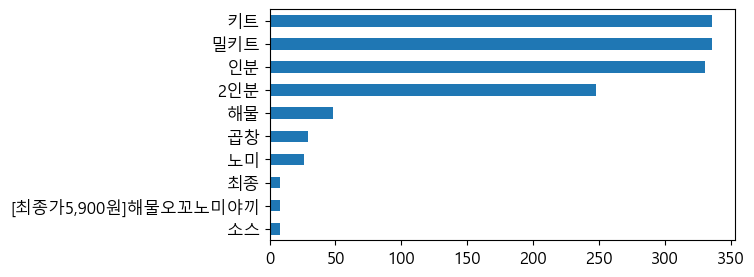

In [72]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

pd.Series(food_count).sort_values(ascending=True)[-10:].plot(kind='barh')

